# Strassen homework

## Exercise 1/2

The generalized version of the strassen multiplication algorithm to non rectangular matrices can be found in the matrix.py file, here I will analize the effect on the execution time

### Square matrices:
The time complexity for multipling two square matrices with size power of two is $T(n) = \Theta(n^{\log_2(7)})$  
This also holds for matrices of uneven size because I can pad the matrices with zeros until I reach the next power of two and make use of the identity

$$
\begin{pmatrix}
A & 0 \\
0 & 0 
\end{pmatrix}
\begin{pmatrix}
B & 0 \\
0 & 0 
\end{pmatrix}
= 
\begin{pmatrix}
AB & 0 \\
0 & 0 
\end{pmatrix}
$$

The time complexity of this algorithm will be:
$$T(n) \leq T(a \cdot n) = \Theta((a \cdot n)^{\log_2(7)}) = \Theta(a^{\log_2(7)} \cdot n^{\log_2(7)}) = \Theta(n^{\log_2(7)})$$
Where $a<2$  

In the matrix.py file I don't scale up the matrices to the next power of two but I add a column or row in case the matrix is odd, this case performs less operations than the one discussed above so the implementation remains $\Theta(n^{\log_2(7)})$

### Rectangular matrices:
For two rectangular matrices of sizes $m$ x $n$ and $n$ x $o$ with $m$, $n$, $o$ power two the execution time is:
$$
T(n, m, o)=
\begin{cases}
5/4 \,(m n + o n) + 7 \cdot T(n/2, m/2, o/2) \quad \max(n, m, o) \geq 64\\
\alpha \quad \max(n, m, o) < 64
\end{cases}
$$
The problem with this recursion is that we don't know $\max(n, m, o)$ which is related to the upper bound of the summation, so we define $M = \max(n, m, o)$  

$$T(n, m, o) = \alpha \frac{5}{4} \sum_{i=0}^{\log_2 M} (7/4)^i n\cdot(m+o) = \alpha\frac{5}{4}n\cdot(m+o) \frac{(7/4)^{\log_2(M)+1} - 1}{7/4 - 1} =
\Theta(n\cdot(m+o)(7/4)^{\log_2 M}) = \Theta(n\cdot(m+o)M^{\log_2(7/4)})$$
If we suppose that $n$ is the maximum among the three indices we get
$$T(n, m, o) = \Theta((m+o)n^{\log_2(7) - 1})$$
From this formula is clear that if $n = m = o$ we get the usual strassen matrix multiplication complexity  
Note that above we ignored the fact that the base case occurs when $M \geq 64$, the reason is because it doesn't matter, as it will only add a constant term independent from the matrix sizes in the summation

We can generalize this formula to non-power-of-two matrices like we did before: Using the above matrix identity and by padding the matrices
$$T(n, m, o) \leq T(a n, b m, c o) = \Theta(an\cdot(bm+co)\cdot \max(a,b,c)M^{\log_2(7/4)}) = \Theta(n\cdot(m+o)M^{\log_2(7/4)})$$
Where $a, b, c<2$  



In [1]:
# Import useful modules
from matrix import *
from random import random, randint, seed
import pytest
import time
from timeit import timeit
from IPython.display import clear_output
import pylab as pl

# Set random seed for reproducibility
seed(42)

In [2]:
def random_matrix(rows: int, cols: int) -> Matrix:
    """
    Returns a matrix filled with uniformly distributed random values

    Parameters
    ----------
    rows: int
        Number of rows
    cols: int
        Number of columns

    Returns
    -------
    Matrix
        Matrix filled with random values
    """

    return Matrix([[random() for j in range(cols)] for i in range(rows)], clone_matrix=False)


# Tests whether the strassen multiplication actually works
for i in range(10):
    # Generate random matrix sizes
    n, m, o = randint(1, 100), randint(1, 100), randint(1, 100)
    # Generate two uniformly distributed random matrices
    A, B = random_matrix(m, n), random_matrix(n, o)
    print(f"Testing {m}x{n} x {n}x{o}")
    
    # I test both the standard strassen and the efficient version with less memory usage
    assert max(max(gauss_matrix_mult(A, B) - better_strassen_matrix_mult(A, B))) == pytest.approx(0.)
    assert max(max(gauss_matrix_mult(A, B) - strassen_matrix_mult(A, B))) == pytest.approx(0., rel=1e-12)
    
clear_output()
print("Tests passed!")

Tests passed!


## Exercise 3
The function implementing the memory efficient version of the strassen's algorithm is better_strassen_matrix_mult which can be found in matrix.py.  
Here I will perform a comparison of the execution time of strassen's matrix multiplication vs the gauss matrix multiplication for square matrices of size power of two

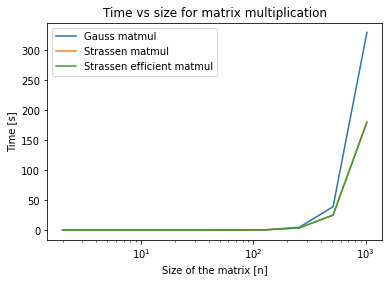

In [3]:
# Sizes to consider
all_n = [2**i for i in range(1, 11)]
time_gauss = []
time_strassen_naive = []
time_strassen_better = []

with open("matrix-times.txt", "w") as f:
    f.write("# size/Gauss_matmul/strassen_matmul/memory_efficient_strassen_matmul")
    for n in all_n:
        # Generate two uniformly distributed random matrices
        A, B = random_matrix(n, n), random_matrix(n, n)
        f.write(f"{n} ")
        
        # Time of the gauss matmul
        start = time.time()
        gauss_matrix_mult(A, B)
        time_gauss.append(time.time() - start)
        f.write(f"{time_gauss[-1]} ")

        # Time of the naive strassen matmul
        start = time.time()
        strassen_matrix_mult(A, B)
        time_strassen_naive.append(time.time() - start)
        f.write(f"{time_strassen_naive[-1]} ")

        # Time of the efficient strassen matmul
        start = time.time()
        better_strassen_matrix_mult(A, B)
        time_strassen_better.append(time.time() - start)
        f.write(f"{time_strassen_better[-1]}\n")

        # To track progress
        print("done:", n)
               
# Clears the output of the cell
clear_output()

# Plot of the elapsed times
pl.plot(all_n, time_gauss, label="Gauss matmul")
pl.plot(all_n, time_strassen_naive, label="Strassen matmul")
pl.plot(all_n, time_strassen_better, label="Strassen efficient matmul")
pl.xscale("log")
pl.ylabel("Time [s]")
pl.xlabel("Size of the matrix [n]")
pl.title("Time vs size for matrix multiplication")
pl.legend()
pl.savefig("Time-comparison.png", dpi=300)

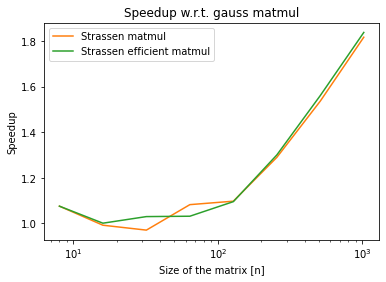

In [4]:
# Plot of the speedup of strassen w.r.t. gauss

speedup_naive = [i/j for i,j in zip(time_gauss, time_strassen_naive)]
speedup_better = [i/j for i,j in zip(time_gauss, time_strassen_better)]
pl.plot(all_n[2:], speedup_naive[2:], label="Strassen matmul", c="tab:orange")
pl.plot(all_n[2:], speedup_better[2:], label="Strassen efficient matmul", c="tab:green")
pl.xscale("log")
pl.ylabel("Speedup")
pl.xlabel("Size of the matrix [n]")
pl.title("Speedup w.r.t. gauss matmul")
pl.legend()
pl.savefig("Strassen-efficency.png", dpi=300)

From the speedup graph we see that the strassen algorithm outperforms the gauss algorithm for $n>128$, furthermore we see that both versions of the strassen have quite similar execution time, this is probably because the matrices are small enough such that the memory is not a problem

## Exercise 4

With the new implementation of the strassen algorithm (better_strassen_matrix_mult in module matrix.py) we reduced by a lot the number of extra space needed, for a single iteration we only need two submatrices storing the sums and one matrix storing the product, along with the full matrix which contains the final result, this gives the following recursion formula for the space complexity
$$
S(n, m, o)=
\begin{cases}
5/4 \,(m n + o n + m o) + S(n/2, m/2, o/2) \quad \max(n, m, o) \geq 64\\
\alpha \quad \max(n, m, o) < 64
\end{cases}
$$
Where I considered $m$ $n$ $o$ power of two, note that this is a similar formula as for the time complexity, however we only have $S(n/2, m/2, o/2)$ instead of $7 \cdot S(n/2, m/2, o/2)$ because we were able to rearrange the operations such that we store only a product at a time, the solution to the above recursion is:

$$S(n, m, o) = \alpha \cdot 5/4 (mn + no + mo) \sum_{i=0}^{log_2 M} 4^{-i} =
\alpha \cdot 5/4 (mn + no + mo) \cdot \frac{4}{3}\bigg(1 - \frac{1}{M^2}\bigg) =
\Theta(mn + no + mo)$$

Where $M = \max(n, m, o)$ and in the last step I used the fact that $(1 - M^{-2}) \leq 1$

For non power of two matrices we reason like before, that is, we enlarge the matrices to the next power of two and we use the matrix identity of exercise 1/2:
$$S(n, m, o) \leq S(an, bm, co) = \Theta(ab\cdot mn + ac\cdot no + bc\cdot mo) = \Theta(mn + no + mo)$$
Because $a, b, c<2$  

This a very important result because it tells us that the Strassen's matrix multiplication space complexity is the same as the Gauss matrix multiplication